# Business Analytics Model: Customer Segmentation

## Step-by-Step Plan for Customer Segmentation Model
### Import Libraries, Load, and Inspect the Dataset
- Import necessary libraries such as pandas, matplotlib, seaborn, sklearn, etc.
- Load the dataset into a Pandas DataFrame.
- Inspect the dataset's structure and basic information (e.g., shape, columns, data types).
### Data Cleaning and Feature Engineering
- Remove any duplicate rows from the dataset.
- Drop irrelevant or redundant columns that are not necessary for clustering.
- Create new features, such as a customer spending group based on the Revenue column.
### Exploratory Data Analysis (EDA)
- Visualize the distributions of numeric features.
- Examine pairwise relationships or correlations between key features.
- Analyze the distribution of the new customer spending groups.
### Data Transformation
- Normalize/scale numerical features using a scaler (e.g., MinMaxScaler) to bring them to a similar range.
- Apply transformations to the features that will be used in clustering.
### Features Selection and Correlation Visualization
- Select relevant features for clustering, excluding non-scaled features like Customer_Age.
- View the correlation matrix of the selected features.
### Determine Optimal Cluster
- Use the Elbow Method to identify the optimal number of clusters (k).
- Plot the inertia for different k values and choose the "elbow point" where inertia reduction is slow.
### K-Means Model Training
Initialize and train the KMeans clustering model, using the elbow method to choose an appropriate number of clusters.
### Save the KMeans Model and Scaler for Deployment
Save the trained KMeans model using Pickle to make it available for deployment and future predictions.
### Evaluate K-Means Model using Multiple Metrics
Evaluate the model's performance using clustering evaluation metrics such as:
- Silhouette Score (higher is better)
- Davies-Bouldin Index (lower is better)
- Calinski-Harabasz Score (higher is better)
### Visualize Clusters
Visualize the results using charts and plots.

## Import Libraries, Load and Inspect the Dataset

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pickle

# Load the dataset
file_path = 'Customer_Segmentation_py.csv'
df = pd.read_csv(file_path)

# Initial inspection of the dataset
print("Initial Dataset Information:")
df.info()  # Print the dataset's info to check the structure
df.head()

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost     

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## Data Cleaning and Feature Engineering

In [5]:
# Data Cleaning and Feature Engineering
# There are no missing values as seen by the df.info() display above.

# Handle duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows if any

# Drop redundant/irrelevant columns: Drop Day, Year, State, and Product columns
df.drop(columns=['Day', 'Year', 'State', 'Product'], inplace=True)

# Add Customer Spending Group
spending_bins = [0, 500, 1000, 2000, 5000, float('inf')]
spending_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Customer_Spending_Group'] = pd.cut(df['Revenue'], bins=spending_bins, labels=spending_labels, right=False)

df.info()
# Display the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Date                     112036 non-null  object  
 1   Month                    112036 non-null  object  
 2   Customer_Age             112036 non-null  int64   
 3   Age_Group                112036 non-null  object  
 4   Customer_Gender          112036 non-null  object  
 5   Country                  112036 non-null  object  
 6   Product_Category         112036 non-null  object  
 7   Sub_Category             112036 non-null  object  
 8   Order_Quantity           112036 non-null  int64   
 9   Unit_Cost                112036 non-null  int64   
 10  Unit_Price               112036 non-null  int64   
 11  Profit                   112036 non-null  int64   
 12  Cost                     112036 non-null  int64   
 13  Revenue                  112036 non-null  int64  

,Date,Month,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Spending_Group
0,26/11/2013,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,8,45,120,590,360,950,Low
1,26/11/2015,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,8,45,120,590,360,950,Low
2,23/03/2014,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,23,45,120,1366,1035,2401,High
3,23/03/2016,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,20,45,120,1188,900,2088,High
4,15/05/2014,May,47,Adults (35-64),F,Australia,Accessories,Bike Racks,4,45,120,238,180,418,Very Low


## Exploratory Data Analysis (EDA)

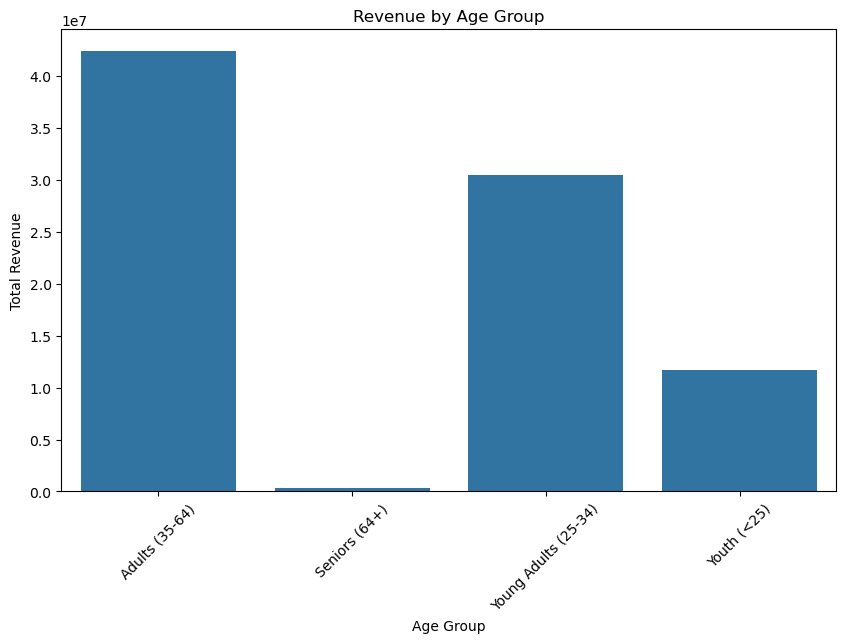

In [7]:
# Revenue by age group
age_group_revenue = df.groupby('Age_Group')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Revenue', data=age_group_revenue)
plt.title('Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

The revenue distribution by age group reveals that adults aged 35-64 generate the highest revenue, likely due to established careers and discretionary spending. The 25-34 age group follows closely, contributing significantly due to early-to-mid career stages, household formation, and major life purchases such as homes and technology. Youth below 25 years generate the third-highest revenue, driven by their evolving purchasing power. Seniors above 64 years generate the least revenue, likely due to retirement and limited disposable income especially on biking activities. Targeting these key groups with tailored marketing strategies could further optimize revenue generation across demographics.

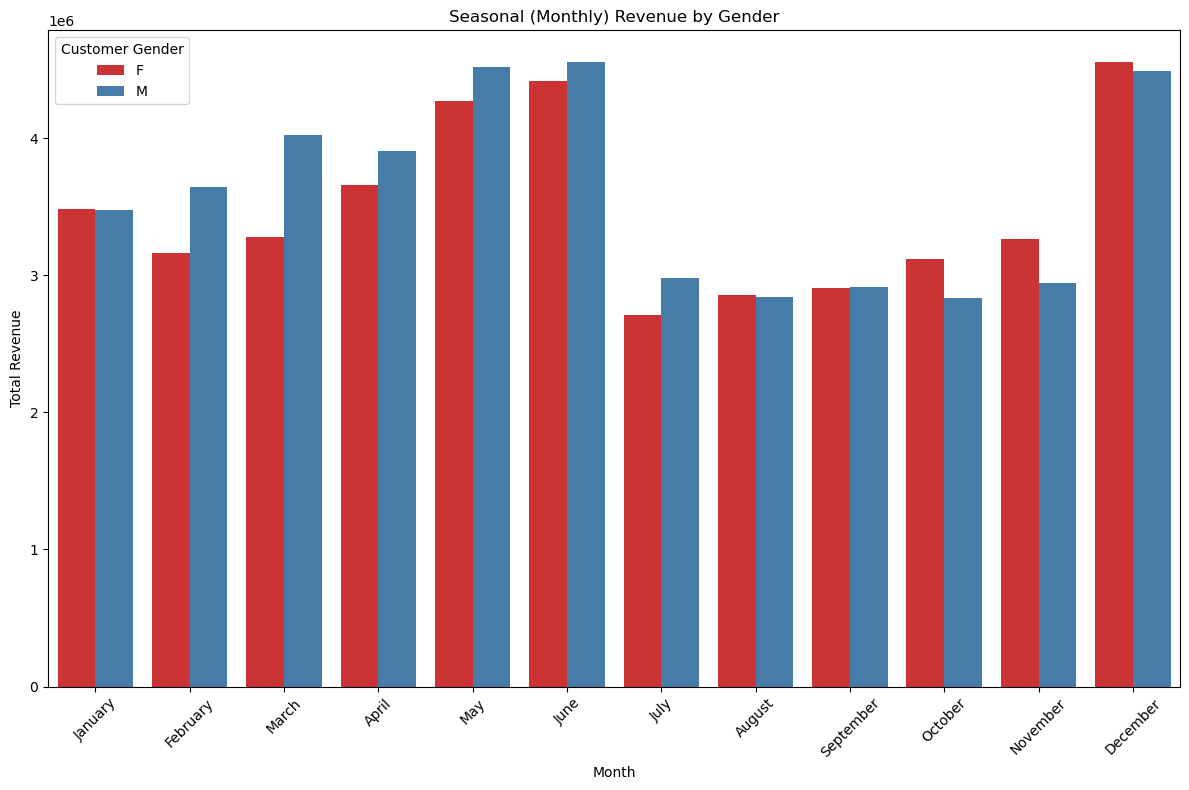

In [9]:
# Seasonal (Monthly) Revenue by Gender
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Group the data by Month and Customer_Gender, aggregating Revenue
revenue_gender_month = df.groupby(['Month', 'Customer_Gender'])['Revenue'].sum().reset_index()

# Convert the 'Month' column to a categorical type with the specified order
revenue_gender_month['Month'] = pd.Categorical(revenue_gender_month['Month'], categories=month_order, ordered=True)

# Sort the data by Month for proper visualization
revenue_gender_month.sort_values('Month', inplace=True)

# Plot the data using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Month', 
    y='Revenue', 
    hue='Customer_Gender', 
    data=revenue_gender_month, 
    palette='Set1', 
    errorbar=None
)

# Add labels and title
plt.title('Seasonal (Monthly) Revenue by Gender')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Customer Gender')
plt.tight_layout()
plt.show()

The seasonal spikes in revenue observed in May, June, and December suggest distinct purchasing behaviours linked to holidays and special events. Men tend to lead during the peak months of May and June, possibly due to events like Father's Day or early summer sales, while women lead in December, likely influenced by the holiday shopping season and end-of-year promotions. The lower revenue months (July to November) might reflect post-summer and pre-holiday periods when consumer spending typically slows. To leverage these trends, targeted marketing campaigns could be designed around these high-revenue months with gender-specific offers to maximize engagement.

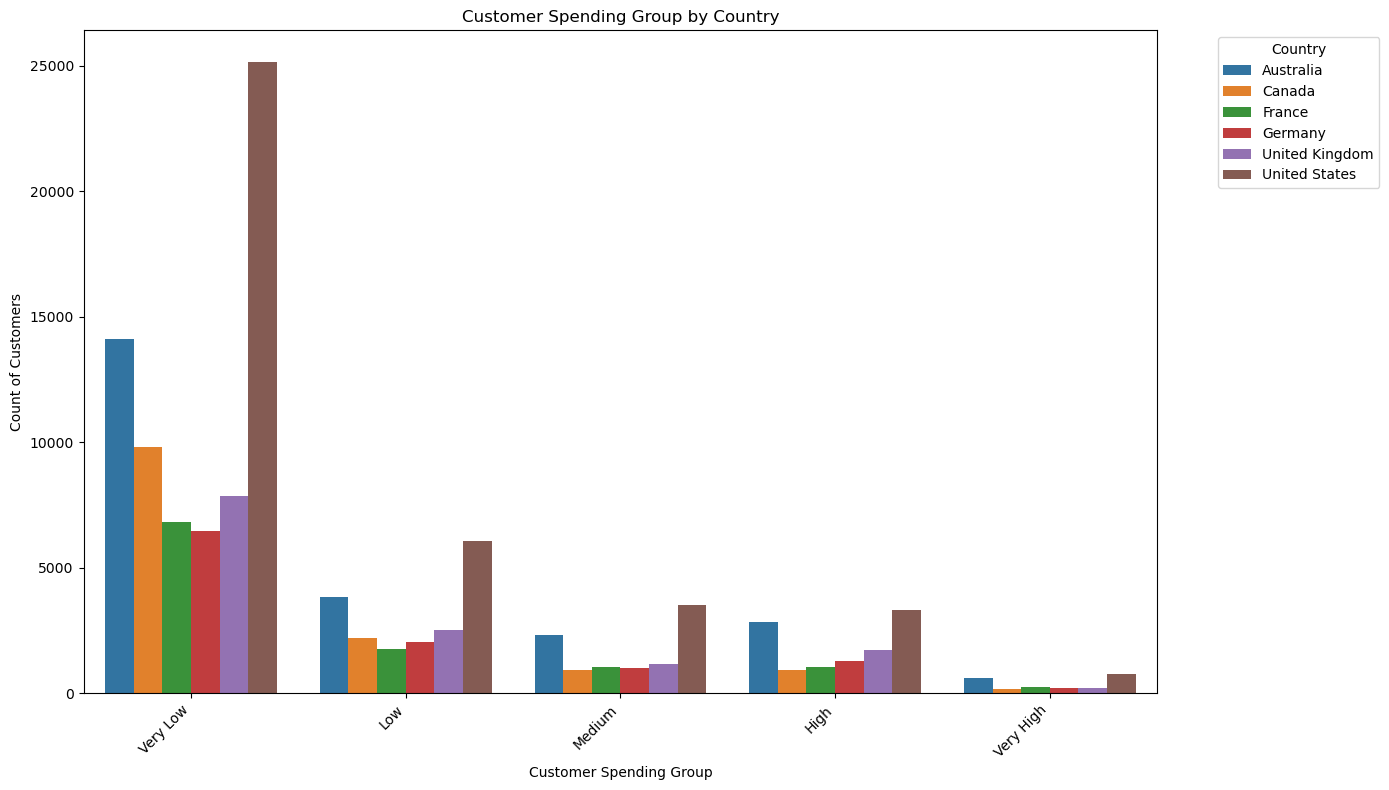

In [11]:
# Grouping data by Customer_Spending_Group and Country
spending_by_country = df.groupby(['Customer_Spending_Group', 'Country'], observed=False).size().reset_index(name='Count')

# Sorting the data for better readability in the plot
spending_by_country.sort_values(['Customer_Spending_Group', 'Country'], inplace=True)

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Customer_Spending_Group', 
    y='Count', 
    hue='Country', 
    data=spending_by_country, 
    palette='tab10', 
    errorbar=None
)

# Adding labels and title
plt.title('Customer Spending Group by Country')
plt.xlabel('Customer Spending Group')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

United states and Australia have the highest population of spenders in the biking section, hence have the highest numbers in every customer spending group. While the United States and Australia lead in overall numbers due to their higher populations of spenders, Australia stands out with a larger percentage of its spending population falling in the High and Very High spending categories compared to the United States. This could suggest that Australian customers are more inclined to make high-value purchases in the biking section, potentially due to cultural or market-specific factors. Conversely, Canada, France, Germany, and the United Kingdom show lower engagement in the biking category, possibly reflecting regional differences in interest or market penetration for biking-related products. These insights could guide more targeted marketing efforts, particularly in Australia, to cater to the high-value spender demographic.

## Data Transformation

In [13]:
# Data Transformation (Scaling)
scaler = MinMaxScaler()
scaling_columns = ['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']  # Relevant columns for normalization
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])
df.head()

,Date,Month,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Spending_Group
0,26/11/2013,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,Low
1,26/11/2015,November,19,Youth (<25),M,Canada,Accessories,Bike Racks,0.225806,0.020276,0.032998,0.040989,0.008353,0.016325,Low
2,23/03/2014,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,0.709677,0.020276,0.032998,0.092291,0.024059,0.041311,High
3,23/03/2016,March,49,Adults (35-64),M,Australia,Accessories,Bike Racks,0.612903,0.020276,0.032998,0.080524,0.020918,0.035921,High
4,15/05/2014,May,47,Adults (35-64),F,Australia,Accessories,Bike Racks,0.096774,0.020276,0.032998,0.017718,0.004165,0.007164,Very Low


## Features Selection and Correlation Visualization

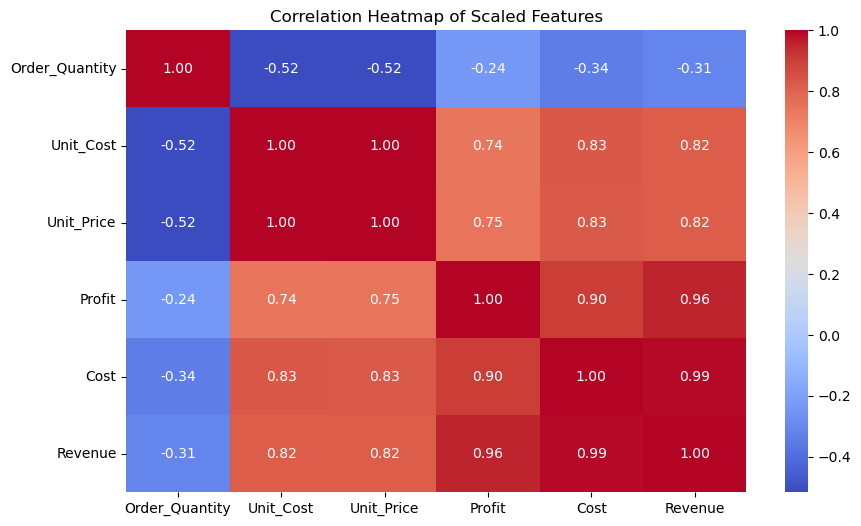

In [15]:
X = df[scaling_columns].copy()

# Calculate the correlation matrix
corr_matrix = X[scaling_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap of Scaled Features")
plt.show()

The heatmap shows a strong positive correlation between Revenue and Cost, Unit Cost and Unit Price, as well as Revenue and Profit, indicating that increased revenue directly impacts both cost and profitability. However, Order Quantity shows minimal correlation with the other variables, suggesting that Order Quantity has a limited direct relationship with Revenue, Cost, or Profit. This implies that while higher order volumes might not significantly influence these metrics, other factors such as pricing and cost structure play a more critical role in driving revenue and profitability. This insight can guide strategic decisions to optimize pricing and cost management rather than focusing solely on increasing order volumes.

## Determine Optimal Clusters

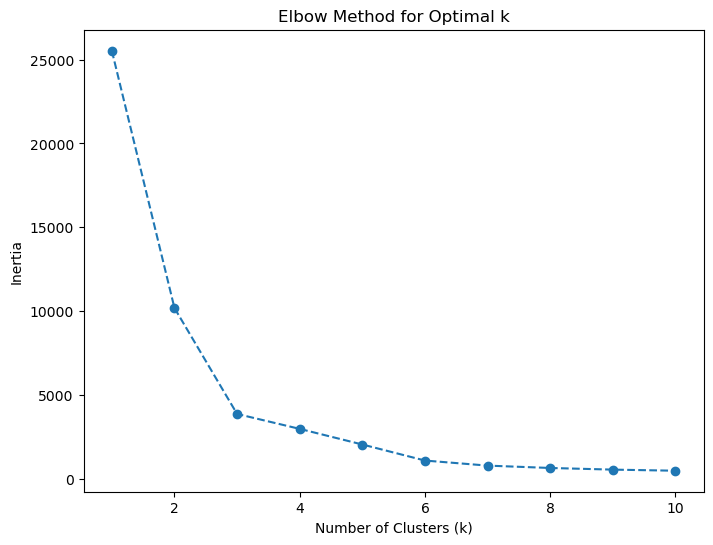

In [17]:
# Use the elbow method to find the best number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[scaling_columns])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

The elbow plot for determining the optimal number of clusters indicates that k=3 is the ideal choice, as evidenced by a clear "elbow" at this point. The inertia decreases rapidly as k increases from 1 to 3, after which the rate of decrease slows significantly. Although k=4 continues to show a slight reduction in inertia, the diminishing returns beyond k=3 suggest that further increasing the number of clusters does not meaningfully improve the model's fit. This behavior suggests that a cluster count of 3 strikes the best balance between simplicity and effective clustering, aligning with the silhouette score of 0.60, which confirms a good level of cluster cohesion and separation.

## K-Means Model Training

In [19]:
# KMeans Clustering Model Training
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[scaling_columns])  # Fit the model on the scaled data

KMeans(n_clusters=3, random_state=42)

In [21]:
# Predict cluster labels for the dataset
df['Cluster'] = kmeans.predict(df[scaling_columns])

# Check the first few rows of cluster assignments
print("Cluster Labels (First 5 Rows):")
print(df[['Cluster']].head())

Cluster Labels (First 5 Rows):
   Cluster
0        0
1        0
2        2
3        2
4        0


## Save the KMeans Model and Scaler for Deployment

In [23]:
# Save the trained K-Means model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved for deployment!")

Model and scaler saved for deployment!


## Evaluate K-Means Model using Multiple Metrics

In [25]:
scaled_data = df[scaling_columns]  # Scaled feature columns

# Silhouette Score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Davies-Bouldin Index
dbi_score = davies_bouldin_score(scaled_data, df['Cluster'])
print(f"Davies-Bouldin Index: {dbi_score:.2f}")

# Calinski-Harabasz Index
chi_score = calinski_harabasz_score(scaled_data, df['Cluster'])
print(f"Calinski-Harabasz Index: {chi_score:.2f}")

Silhouette Score: 0.60
Davies-Bouldin Index: 0.51
Calinski-Harabasz Index: 314202.16


The evaluation of the K-Means clustering model using three metrics demonstrates strong performance. A Silhouette Score of 0.60 indicates moderately well-separated clusters, with some overlap but acceptable for real-world data. The Davies-Bouldin Index (0.51) confirms well-defined clusters with high compactness and separation, while the Calinski-Harabasz Index (314202.16) highlights excellent cluster compactness and distinctiveness. These results validate the model's suitability for customer segmentation in Amazon’s biking segment. While the metrics confirm deployment readiness, further validation through visualization and business alignment is recommended.

## Visualize Clusters

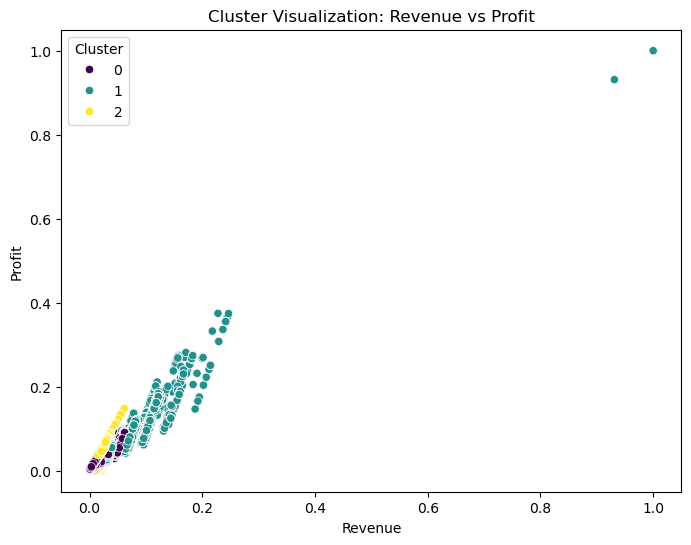

In [26]:
# Visualize the clusters (using Revenue vs Profit)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Revenue', y='Profit', hue='Cluster', palette='viridis')
plt.title("Cluster Visualization: Revenue vs Profit")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.legend(title="Cluster")
plt.show()

The scatterplot visualizes the relationship between Revenue and Profit across clusters. Each cluster exhibits distinct patterns, with most data points concentrated at lower Revenue and Profit levels, indicating common characteristics among customers. Cluster separation suggests varying profitability and revenue-generating potential, highlighting opportunities for tailored strategies to optimize performance in each segment.

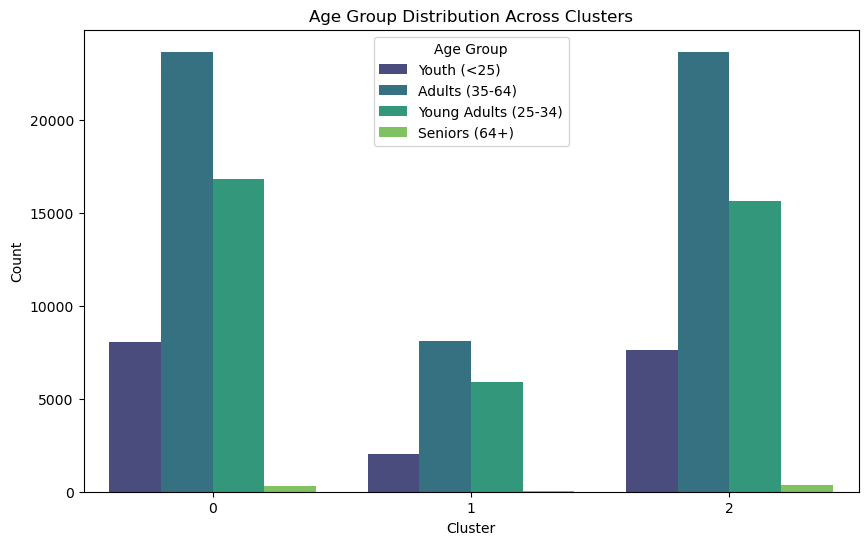

In [29]:
# Visualize age group distribution by cluster
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.countplot(data=df, x='Cluster', hue='Age_Group', palette='viridis')
plt.title("Age Group Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Age Group")
plt.show()

The chart illustrates the distribution of age groups across three clusters, showing that Adults (35-64) and Young Adults (25-34) dominate all clusters, with minimal representation from Youth (<25) and Seniors (64+). Cluster 1 shows a slightly higher proportion of Young Adults compared to the other clusters, indicating a potential demographic shift. The low presence of Youth and Seniors suggests the business offerings may be less appealing to these groups. To improve inclusivity, strategies could focus on engaging these underrepresented demographics while tailoring marketing efforts to the dominant age groups.